<a href="https://colab.research.google.com/github/emilygolf/Predicting-Seismicity/blob/main/Machine_learning_STATS112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project | Stats 112 | Emily Snell | Machine Learning

---

My goal is to use a machine learning model to predict the earthquakes associated with eruptions which occured in the past, beofre seismometers were invented. 

My training data is from modern eruptions and earthquakes in "eq_erupt_df_clean"

My testing/predicting data is in "historical_eruptions_df_clean"

# Read in data!

In [1]:
#read in the data 
import requests
import pandas as pd
import os 
!git clone https://github.com/emilygolf/Final-Project.git

Cloning into 'Final-Project'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 152 (delta 22), reused 60 (delta 17), pack-reused 79
Receiving objects: 100% (152/152), 9.53 MiB | 8.63 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
#move to the right folder to acess the data 
%cd /content/Final-Project/DataSci\ Final\ Project

/content/Final-Project/DataSci Final Project


In [3]:
eq_erupt_df = pd.read_csv('final.csv')
eq_erupt_df

,Unnamed: 0,level_0,index,time,latitude_earthquake,longitude_earthquake,depth,mag,horizontalError,depthError,magError,Date,Volcano Name,Country,Type,Start Date,latitude_eruption,longitude_eruption,VEI,End Date
0,0,6.0,792.0,1994-06-06T20:47:40.530Z,2.9170,-76.0570,12.10,6.8,NaN,NaN,NaN,10/26/08,"Huila, Nevado del",Colombia,Stratovolcano,10/26/08,2.930,-76.030,5.0,1/14/12
1,1,7.0,4528.0,1995-10-11T22:44:38.970Z,10.8510,-85.3160,161.80,4.3,NaN,NaN,NaN,8/10/94,Rincon de la Vieja,Costa Rica,Complex volcano,8/10/94,NaN,NaN,NaN,NaN
2,2,19.0,31.0,2015-01-23T03:07:03.020Z,64.6538,-17.5206,6.63,4.6,6.9,3.4,0.076,6/21/18,Bardarbunga,Iceland,Stratovolcano,6/21/18,NaN,NaN,NaN,NaN
3,3,20.0,84.0,2014-12-23T22:23:48.060Z,64.6315,-17.5050,6.65,4.5,3.0,4.7,0.085,8/29/14,Bardarbunga,Iceland,Stratovolcano,8/29/14,64.633,-17.516,2.0,2/27/15
4,4,21.0,128.0,2014-12-02T02:18:28.000Z,64.6660,-17.4870,2.50,5.3,6.8,3.9,NaN,8/29/14,Bardarbunga,Iceland,Stratovolcano,8/29/14,64.633,-17.516,2.0,2/27/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,16208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,St. Helens,NaN,NaN,10/1/04,46.200,-122.180,2.0,1/27/08
16209,16209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,St. Helens,NaN,NaN,11/5/90,46.200,-122.180,3.0,2/14/91
16210,16210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tair, Jebel at",NaN,NaN,9/30/07,15.550,41.830,3.0,6/16/08
16211,16211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zubair Group,NaN,NaN,9/28/13,15.050,42.180,2.0,11/20/13


In [4]:
eq_erupt_df_clean = eq_erupt_df[['depth', 'mag', 'Volcano Name', 'Country', 'Type', 'VEI']]

In [5]:
#historical eruptions
historical_eruptions_df = pd.read_csv('historical_eruptions.csv')
historical_eruptions_df

,Unnamed: 0,Name,Date,VEI,Type_x,Volcano Name,Country,Location,Latitude,Longitude,Type_y
0,0,Aniakchak,1450C,5,Caldera,Aniakchak,United States,Alaska Peninsula,56.880,-158.170,Caldera
1,1,Kuwae,1452,6,Caldera,Kuwae,Vanuatu,Vanuatu-SW Pacific,-16.829,168.536,Caldera
2,2,Bardarbunga,1477,5,Stratovolcano,Bardarbunga,Iceland,Iceland-NE,64.633,-17.516,Stratovolcano
3,3,St. Helens,1480D,5,Stratovolcano,St. Helens,United States,US-Washington,46.200,-122.180,Stratovolcano
4,4,St. Helens,1540,5,Stratovolcano,St. Helens,United States,US-Washington,46.200,-122.180,Stratovolcano
5,5,St. Helens,18-May-80,5,Stratovolcano,St. Helens,United States,US-Washington,46.200,-122.180,Stratovolcano
6,6,Billy Mitchell,1580C,6,Ash shield,Billy Mitchell,Papua New Guinea,Bougainville-SW Paci,-6.092,155.225,Pyroclastic shield
7,7,Raung,1593,5,Stratovolcano,Raung,Indonesia,Java,-8.119,114.056,Stratovolcano
8,8,Huaynaputina,1600,6,Explosion crater,Huaynaputina,Peru,Peru,-16.608,-70.850,Stratovolcano
9,9,Parker,"Jan. 4, 1641",6,Stratovolcano,Parker,Philippines,Mindanao-Philippines,6.113,124.892,Stratovolcano


In [6]:
historical_eruptions_df_clean = historical_eruptions_df[['Date', 'VEI', 'Volcano Name', 'Country']]
historical_eruptions_df_clean['Type'] = historical_eruptions_df['Type_x']

<ipython-input-6-4259632deec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_eruptions_df_clean['Type'] = historical_eruptions_df['Type_x']


# Building Models

---

-Training variables: Volcano Name, Country, VEI, Type, mag

-Predicting: mag (magnitude of earthquake per given eruption)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor

# How will I treat NaN's?

---

Currently, I have some NaN values for magnitude and for VEI depending on if the row represents an earthquake without an eruption or an eruption without an earthquake. 

For NaN's in magnitude I will drop those from the data set since an eruption without earthquake data is not helpful, and further most if not all of my data exploration was done soely with volcanoes which had seismic data. 

For the NaN's in my VEI data, I will fill those in with 0's as those rows indicate earthquakes which occured outside of an eruption, meaning there was no eruption and the magnitude was 0!

In [8]:
#drop rows without mag data
eq_erupt_df_clean = eq_erupt_df_clean.dropna(subset='mag')
#fill in VEI nan's with 0
eq_erupt_df_clean['VEI'] = eq_erupt_df_clean['VEI'].fillna(0)

<ipython-input-8-22b4a5126a75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_erupt_df_clean['VEI'] = eq_erupt_df_clean['VEI'].fillna(0)


# 1) Kneighbors- testing optimal K, scaler, and metric

In [9]:
#define vars

features = list(eq_erupt_df_clean.columns.drop(["depth", 'mag']))
cat_vars = ['Country', 'Volcano Name', 'Type']
quant_vars = [f for f in features if f not in cat_vars]


y_train = eq_erupt_df_clean["mag"]

1.a) Testing K

In [10]:
from typing_extensions import ClassVar

X_train = eq_erupt_df_clean[features]

#make column transformer
ct = make_column_transformer(
    (StandardScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
#pipeline
pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(metric="cosine"))

cv = GridSearchCV(pipeline,
                   param_grid={
                       "kneighborsregressor__n_neighbors": range(1, 20)
                       },
                   scoring="neg_mean_squared_error",
                   cv=10)
cv.fit(X_train, y_train)
cv.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(), ['VEI']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Volcano Name',
                                                   'Type'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='cosine', n_neighbors=15))])

15    0.379522
14    0.381626
dtype: float64

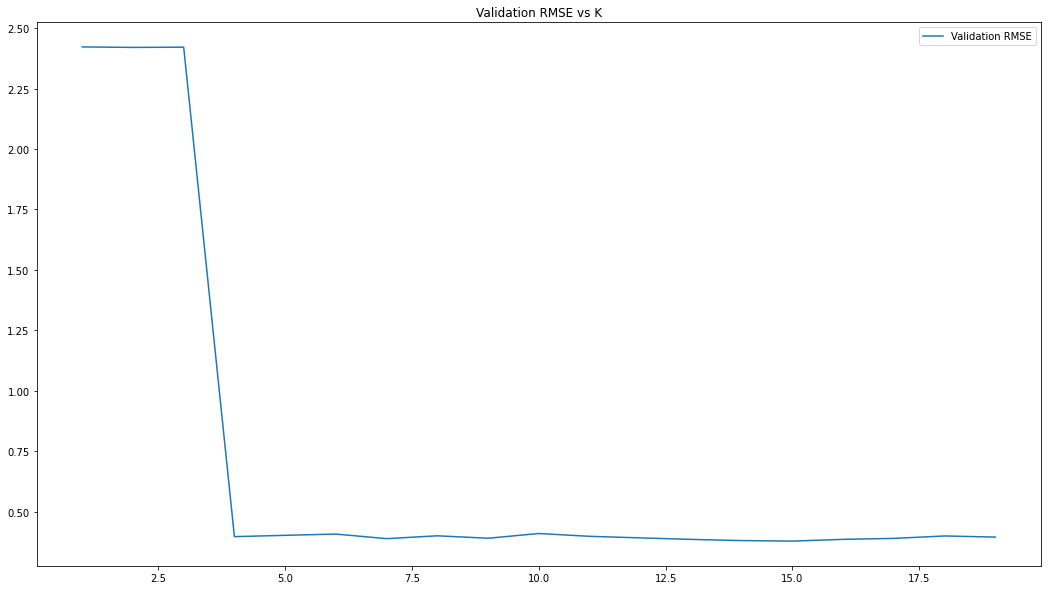

In [11]:

results = cv.cv_results_

# plot rsme with each k 
cv_rmse = pd.Series(
            np.sqrt(-results["mean_test_score"]),
            index=results["param_kneighborsregressor__n_neighbors"]
            )

cv_rmse.plot.line(legend=True, label="Validation RMSE", figsize=(18, 10), title="Validation RMSE vs K")
cv_rmse.sort_values().head(2)

Interesting results! There is big decrease in RSME at 3.5 ish. But the optimal K is 15, which I will proceed with

1.b) Testing scaler with metric

In [12]:

#define my scalers
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

for scaler in scalers:
  #again dropping not necessary but does not hurt
  #here I flip through each scaler
  ct = make_column_transformer(
    (scaler, quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")

  pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=15))

  #test each of the metrics with each scaler and possible k
  grid_cv = GridSearchCV(
  pipeline,
  param_grid={
  "kneighborsregressor__metric": ["euclidean", "manhattan", "cosine"]},
  scoring="neg_mean_squared_error", cv=10)
  grid_cv.fit(X_train, y_train)
  print(scaler, ':', grid_cv.best_params_, ':', -grid_cv.best_score_)

StandardScaler() : {'kneighborsregressor__metric': 'cosine'} : 0.1440367035078996
MinMaxScaler() : {'kneighborsregressor__metric': 'cosine'} : 0.1440367035078996
RobustScaler() : {'kneighborsregressor__metric': 'cosine'} : 0.1440367035078996


Now I know that cosine is the best metric but actually the scaler has no effect on my RSME

My final Kneighbors model: k=15, metric=cosine, and scaler=StandardScaler()

**My best RSME is: 0.1440367!**

# Predicting with KNeighbors

---

I've finished testing with my first machine learning model and now I am ready to predict with KNeighbors so I can save my model and outputs for future use!

In [13]:
test_df = historical_eruptions_df_clean[['Type', 'VEI', 'Volcano Name', 'Country']]

ct_kneigh = make_column_transformer(
    (StandardScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
model_kneigh = make_pipeline(ct,KNeighborsRegressor(n_neighbors=15, metric='cosine'))

model_kneigh.fit(X_train, y_train)
output_kneigh = model_kneigh.predict(test_df)

# 2) Linear Regression

---
Now we can repeat the methodology above with Linear Regression


2.a) testing scaler for linear regression

In [14]:

#testing same scaler above
for scaler in scalers:
  #again dropping not necessary but does not hurt
  ct = make_column_transformer(
    (scaler, quant_vars), 
    (OneHotEncoder(handle_unknown='ignore'), cat_vars),
    remainder="drop")
  #now apply the preprocessors to the pipeline
  pipeline = make_pipeline(ct, LinearRegression())
  #test each of the metrics with each scaler and possible k
  print(scaler, ':', -cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10).mean())


StandardScaler() : 8.18189708539068e+24
MinMaxScaler() : 8.18189708539068e+24
RobustScaler() : 8.18189708539068e+24


Wow! high RSME!

**My lowest RSME is: 8.1819 x 10^24**

I will still save my outputs but might not include it in my emsemble models later on

# Predicting with LinearRegression

In [15]:

ct_LR = make_column_transformer(
    (StandardScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
model_LR = make_pipeline(ct,LinearRegression())

model_LR.fit(X_train, y_train)
output_LR = model_LR.predict(test_df)

# 3) Random Forest 

3.a) testing k and scaler

In [16]:

for scaler in scalers:
  #again dropping not necessary but does not hurt
  ct = make_column_transformer(
    (scaler, quant_vars), 
    (OneHotEncoder(handle_unknown='ignore'), cat_vars),
    remainder="drop")
  #now apply the preprocessors to the pipeline
  pipeline = make_pipeline(ct, RandomForestRegressor())
  #test each of the metrics with each scaler and possible k
  grid_cv = GridSearchCV(
  pipeline,
  param_grid={
  "randomforestregressor__n_estimators":range(1,51,5)},
  scoring="neg_mean_squared_error", cv=10)
  grid_cv.fit(X_train, y_train)
  print(scaler, ':', grid_cv.best_params_, ':', -grid_cv.best_score_)

StandardScaler() : {'randomforestregressor__n_estimators': 26} : 0.13493612555081852
MinMaxScaler() : {'randomforestregressor__n_estimators': 6} : 0.1348206011747994
RobustScaler() : {'randomforestregressor__n_estimators': 16} : 0.13502803839826844


MinMaxScaler with n_estimators of 6 is optimal

However since the RSME's are pretty close let's plot some errors with K (n_estimators) to see if there is any odd behaviors.

Let's plot this to explore more before chosing which combo to go forward with!

In [17]:
#testin minmax combo

ct = make_column_transformer(
    (MinMaxScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
#pipeline
pipeline = make_pipeline(
    ct,
    RandomForestRegressor())

cv = GridSearchCV(pipeline,
                   param_grid={
                       "randomforestregressor__n_estimators":range(1,51,5)
                       },
                   scoring="neg_mean_squared_error",
                   cv=10)
cv.fit(X_train, y_train)
cv.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(), ['VEI']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Volcano Name',
                                                   'Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=31))])

31    0.367441
16    0.367460
dtype: float64

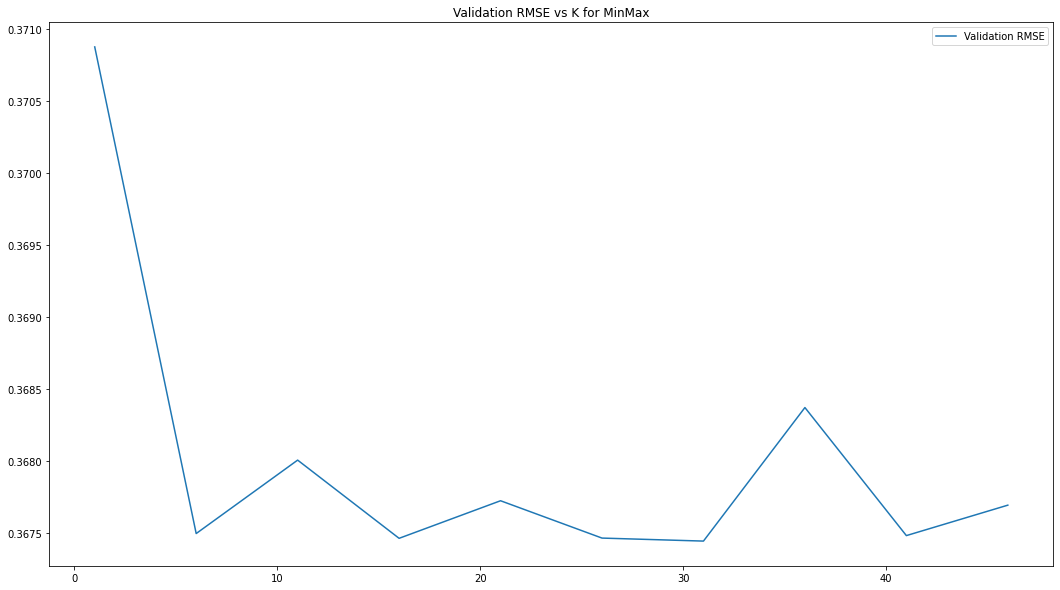

In [18]:
results = cv.cv_results_

# plot rsme with each k 
cv_rmse = pd.Series(
            np.sqrt(-results["mean_test_score"]),
            index=results["param_randomforestregressor__n_estimators"]
            )

cv_rmse.plot.line(legend=True, label="Validation RMSE", figsize=(18, 10), title="Validation RMSE vs K for MinMax")
cv_rmse.sort_values().head(2)

RSME is very jagged and actually has two minimums at 31 and 16

I will actually move forward with 31 for MinMax

**My lowest RSME is: 0.367441!**

let's try just take a look at the standard scaler graph to see if the RSME plots similarly or is less jagged

In [19]:
#testin standard scaler combo

ct = make_column_transformer(
    (StandardScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
#pipeline
pipeline = make_pipeline(
    ct,
    RandomForestRegressor())

cv = GridSearchCV(pipeline,
                   param_grid={
                       "randomforestregressor__n_estimators":range(1,51,5)
                       },
                   scoring="neg_mean_squared_error",
                   cv=10)
cv.fit(X_train, y_train)
cv.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(), ['VEI']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'Volcano Name',
                                                   'Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=11))])

11    0.367299
16    0.367402
dtype: float64

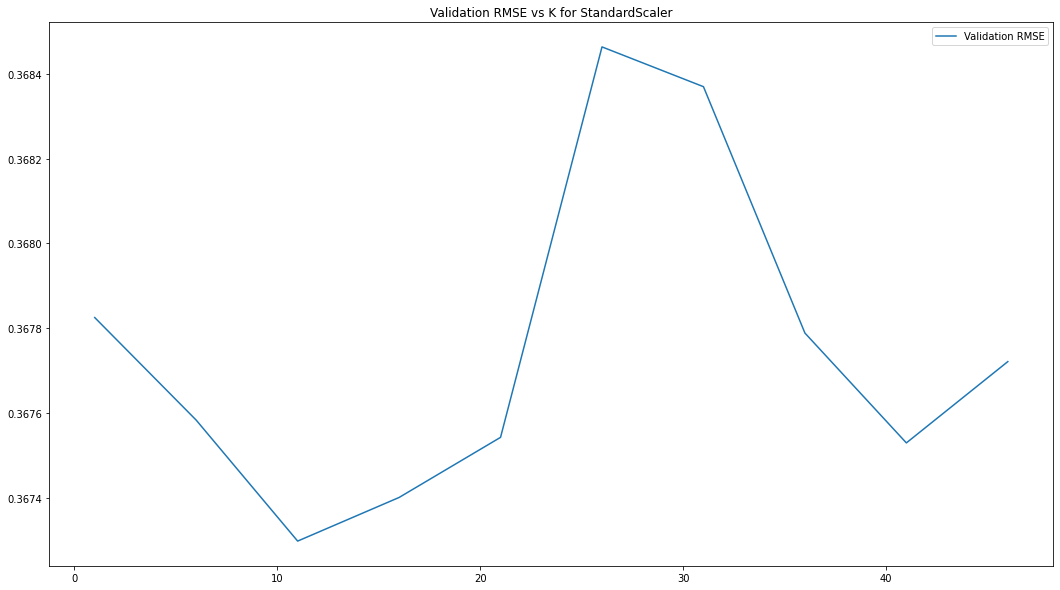

In [20]:
results = cv.cv_results_

# plot rsme with each k 
cv_rmse = pd.Series(
            np.sqrt(-results["mean_test_score"]),
            index=results["param_randomforestregressor__n_estimators"]
            )

cv_rmse.plot.line(legend=True, label="Validation RMSE", figsize=(18, 10), title="Validation RMSE vs K for StandardScaler")
cv_rmse.sort_values().head(2)

again very jagged. And the RSME drastically increases from 21-30(ish) I will move forward with the MinMax combination! 

# Predicting with RandomForest

In [23]:

ct_RF = make_column_transformer(
    (MinMaxScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
model_RF = make_pipeline(ct,RandomForestRegressor(n_estimators=31))

model_RF.fit(X_train, y_train)
output_RF = model_RF.predict(test_df)

# 4) Descision Tree

this will be the final model I test :) 

4.a) testing scalers, depth, and sample leaf!

In [24]:
for scaler in scalers:
  #again dropping not necessary but does not hurt
  ct = make_column_transformer(
    (scaler, quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
  #now apply the preprocessors to the pipeline
  pipeline = make_pipeline(ct, DecisionTreeRegressor())
  #test each of the metrics with each scaler and possible k
  grid_cv = GridSearchCV(
  pipeline,
  param_grid={
  "decisiontreeregressor__max_depth":range(1,10),
  "decisiontreeregressor__min_samples_leaf":range(1,10)},
  scoring="neg_mean_squared_error", cv=10)
  grid_cv.fit(X_train, y_train)
  print(scaler, ':', grid_cv.best_params_, ':', -grid_cv.best_score_)

StandardScaler() : {'decisiontreeregressor__max_depth': 2, 'decisiontreeregressor__min_samples_leaf': 2} : 0.13567943362524654
MinMaxScaler() : {'decisiontreeregressor__max_depth': 2, 'decisiontreeregressor__min_samples_leaf': 2} : 0.13567943362524654
RobustScaler() : {'decisiontreeregressor__max_depth': 2, 'decisiontreeregressor__min_samples_leaf': 3} : 0.13567943362524654


Alrighty! I looks like best RSME actually does not vary but the combinations of scalers and parameters do vary

My 4th model will be decision tree with scaler=MinMaxScaler max depth=2, and min samples leaf=2

Let's save these output!!

**Best RSME is 0.13567!**

# Predicting with Decision Tree

In [25]:

ct_DT = make_column_transformer(
    (MinMaxScaler(), quant_vars),
    (OneHotEncoder(handle_unknown="ignore"), cat_vars),
    remainder="passthrough")
model_DT = make_pipeline(ct,DecisionTreeRegressor(max_depth=2, min_samples_leaf=2))

model_DT.fit(X_train, y_train)
output_DT = model_DT.predict(test_df)

# Ensemble Models!


---

Now let's try voting and stacking my models to produce the lowest RSME!

# 1) Voting

With Linear Regression

In [26]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
ensemble_model_vote = VotingRegressor([
    ("kneigh", model_kneigh), ("LR", model_LR),
    ("DecisionT", model_DT), ("RanFor", model_RF)])

cv_errs = -cross_val_score(ensemble_model_vote, 
                            X=X_train,
                            y=y_train,
                            scoring="neg_mean_squared_error", cv=10)
ensemble_vote_rmse = np.sqrt(cv_errs.mean())

models = {"Model Name": [], "Validation RSME": []}

models["Model Name"].append("EnsembleModel_Voting")
models["Validation RSME"].append(ensemble_vote_rmse)


Now the same but without Linear Regression since it had a high RSME :) 

In [27]:
ensemble_model_vote = VotingRegressor([
    ("kneigh", model_kneigh),
    ("DecisionT", model_DT), ("RanFor", model_RF)])

cv_errs = -cross_val_score(ensemble_model_vote, 
                            X=X_train,
                            y=y_train,
                            scoring="neg_mean_squared_error", cv=10)
ensemble_vote_rmse = np.sqrt(cv_errs.mean())

models["Model Name"].append("EnsembleModel_Voting_no_LR")
models["Validation RSME"].append(ensemble_vote_rmse)


# 2) Stacking

with Linear Regression

In [28]:
ensemble_model_stack = StackingRegressor([
    ("kneigh", model_kneigh), ("LR", model_LR),
    ("DecisionT", model_DT), ("RanFor", model_RF)],
    final_estimator=DecisionTreeRegressor(max_depth=2, min_samples_leaf=1))

cv_errs = -cross_val_score(ensemble_model_stack, 
                            X=X_train,
                            y=y_train,
                            scoring="neg_mean_squared_error", cv=10)
ensemble_stack_rmse = np.sqrt(cv_errs.mean())

models["Model Name"].append("EnsembleModel_Stacking")
models["Validation RSME"].append(ensemble_stack_rmse)


without Linear Regression

In [29]:
ensemble_model_stack = StackingRegressor([
    ("kneigh", model_kneigh),
    ("DecisionT", model_DT), ("RanFor", model_RF)],
    final_estimator=DecisionTreeRegressor(max_depth=2, min_samples_leaf=1))

cv_errs = -cross_val_score(ensemble_model_stack, 
                            X=X_train,
                            y=y_train,
                            scoring="neg_mean_squared_error", cv=10)
ensemble_stack_rmse = np.sqrt(cv_errs.mean())

models["Model Name"].append("EnsembleModel_Stacking_no_LR")
models["Validation RSME"].append(ensemble_stack_rmse)


In [30]:
pd.DataFrame(models).sort_values('Validation RSME')

,Model Name,Validation RSME
3,EnsembleModel_Stacking_no_LR,3.652624e-01
2,EnsembleModel_Stacking,3.653245e-01
1,EnsembleModel_Voting_no_LR,3.665593e-01
0,EnsembleModel_Voting,7.151004e+11


As we can see my winning model is a stacking of all of my models without LR (linear regression)

However:

***The associated RSME is 0.36528 ***

As a result my winning model is actually the Decision Tree model alone at **RSME of 0.1356**

I will predict with both Decision Tree and my winning stacking model however just to be safe

# Final Predictions!

In [32]:
stacker = StackingRegressor([
    ("kneigh", model_kneigh),
    ("DecisionT", model_DT), ("RanFor", model_RF)],
    final_estimator=DecisionTreeRegressor(max_depth=2, min_samples_leaf=1))
stacker.fit(X_train, y_train)
output_stack = stacker.predict(test_df)

In [33]:
historical_eruptions_df_clean['Magnitude - Decision Tree'] = pd.Series(output_DT)

<ipython-input-33-991c541c0651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_eruptions_df_clean['Magnitude - Decision Tree'] = pd.Series(output_DT)


In [34]:
historical_eruptions_df_clean['Magnitude - Stacker'] = pd.Series(output_stack)

<ipython-input-34-7a78dec7931c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_eruptions_df_clean['Magnitude - Stacker'] = pd.Series(output_stack)


# Visualizing the predictions!

In [35]:
#Final Results!!!
historical_eruptions_df_clean

,Date,VEI,Volcano Name,Country,Type,Magnitude - Decision Tree,Magnitude - Stacker
0,1450C,5,Aniakchak,United States,Caldera,3.170264,2.773594
1,1452,6,Kuwae,Vanuatu,Caldera,6.300000,2.773594
2,1477,5,Bardarbunga,Iceland,Stratovolcano,6.300000,2.773594
3,1480D,5,St. Helens,United States,Stratovolcano,3.170264,2.773594
4,1540,5,St. Helens,United States,Stratovolcano,3.170264,2.773594
5,18-May-80,5,St. Helens,United States,Stratovolcano,3.170264,2.773594
6,1580C,6,Billy Mitchell,Papua New Guinea,Ash shield,6.300000,2.773594
7,1593,5,Raung,Indonesia,Stratovolcano,6.300000,2.773594
8,1600,6,Huaynaputina,Peru,Explosion crater,6.300000,2.773594
9,"Jan. 4, 1641",6,Parker,Philippines,Stratovolcano,6.300000,2.773594


As we can see, the decision tree and stacking method came up with very different predictions. 

The Stacker actually predicted ths same magnitude for every eruption which clearly is not a good estimate

As the Decision Tree had a much lower RSME I would trust the Decision Tree predicitions more. 

as we can see it predicts larger earthquake magnitudes overall than the stacking method which makes sense. In fact the stacker predictions do not make much sense as 2.7 magnitude earthquake is quite small compared to eruptions of 5-6 VEI. 

Let's make a final data set with just the decision tree results!

In [36]:
historical_predictions = historical_eruptions_df_clean.iloc[:,[0,1,2,3,4]]
historical_predictions['Earthquake Mag'] = historical_eruptions_df_clean['Magnitude - Decision Tree']

<ipython-input-36-7c6f63b46282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_predictions['Earthquake Mag'] = historical_eruptions_df_clean['Magnitude - Decision Tree']


In [37]:
historical_predictions

,Date,VEI,Volcano Name,Country,Type,Earthquake Mag
0,1450C,5,Aniakchak,United States,Caldera,3.170264
1,1452,6,Kuwae,Vanuatu,Caldera,6.300000
2,1477,5,Bardarbunga,Iceland,Stratovolcano,6.300000
3,1480D,5,St. Helens,United States,Stratovolcano,3.170264
4,1540,5,St. Helens,United States,Stratovolcano,3.170264
5,18-May-80,5,St. Helens,United States,Stratovolcano,3.170264
6,1580C,6,Billy Mitchell,Papua New Guinea,Ash shield,6.300000
7,1593,5,Raung,Indonesia,Stratovolcano,6.300000
8,1600,6,Huaynaputina,Peru,Explosion crater,6.300000
9,"Jan. 4, 1641",6,Parker,Philippines,Stratovolcano,6.300000


Now we have estimates of earthquakes for ancient eruptions!!! This is so cool!

# Final Notes

Some final notes would include that my source of data was very limited. As we can see with my predictions, the model essentially predicted two different magnitudes and assigned them based on different inputs (either 6.3 or 3.170). 

I assume this is an artifact of my limited earthquake and eruption data. I collected all USGS data from 1990-2023 which included almost 120,000 earthquakes. I think this project was fun and informative but also showcases the advancements that need to be made in volcanology. There simply is not a ton of seismic data available for volcanoes, and usually it is only for a few famous volcanoes with lots of researchers interested in it (ie at Hawaii or Iceland). 

I think these estimates give a ball park idea of how seismically active the eruptions were, but more work could be done to produce better estimates! 

I hope you learned more about volcanoes along the way nonetheless!